In [222]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [253]:
df = pd.read_csv("virat.csv")

In [254]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [233]:
## Your code here

df['Runs'].value_counts()
df['Runs'].describe()
df.info()

# plt.hist(df['Runs']);

df['Runs'].value_counts()
# df['Runs'] = df['Runs'].str.replace('*','')
# df['Runs'] = df['Runs'].astype(int)
df['Runs']= df['Runs'].apply(lambda x: int(x[:, -1]) if x[-1] == '*' else int(x))
df.info()
df['Runs'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


TypeError: string indices must be integers

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

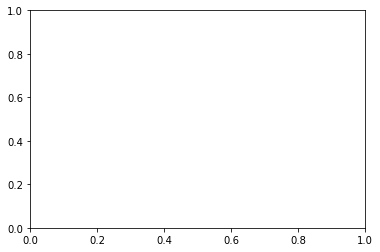

In [234]:
#Your code here

plt.boxplot(df['Runs']);

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [227]:
## Your code here

pd.to_datetime(df['Start Date'])

df['Year'] = pd.DatetimeIndex(df['Start Date']).year
df['Year'].value_counts()

2011    31
2013    23
2014    17
2010    16
2012    11
2015    10
2016    10
2009     6
2008     5
2017     3
Name: Year, dtype: int64

In [228]:
df.groupby('Year')['Runs'].max().max()


'99'

In [229]:
df.groupby('Year')['Runs'].mean().max()

TypeError: Could not convert 2*30102754107 to numeric

In [218]:
# pivot table banaera gareni hun6
# create a pivot table with the ‘Start Date’ entities as the columns, values set to ‘Runs’, and aggfunc() set to np.mean
# and np.max. 

import numpy as np
pd.pivot_table(df, values = 'Runs',  columns = ['Start Date'], aggfunc = np.mean).max().max()
pd.pivot_table(df, values = 'Runs',  columns = ['Start Date'], aggfunc = np.max).max().max()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:979: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  result = op.agg()


'99'

#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [219]:
df['Mins'].str.contains('-').sum()


6

In [220]:
df['Mins']

0       33
1       82
2       40
3       87
4       45
      ... 
127     64
128    152
129    147
130      6
131     81
Name: Mins, Length: 132, dtype: object

In [221]:
df[df['Mins'].str.contains('-')]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Year
10,107,-,114,11,1,93.85,4,caught,2,v Sri Lanka,Kolkata,24-Dec-09,2009
13,31,-,46,1,0,67.39,5,caught,1,v South Africa,Jaipur,21-Feb-10,2010
14,57,-,71,4,1,80.28,3,caught,2,v South Africa,Ahmedabad,27-Feb-10,2010
51,86*,-,99,11,0,86.86,4,not out,2,v England,Mumbai,23-Oct-11,2011
105,49,-,44,2,2,111.36,4,caught,2,v Sri Lanka,Ahmedabad,6-Nov-14,2014
106,53,-,61,4,1,86.88,4,caught,2,v Sri Lanka,Hyderabad (Deccan),9-Nov-14,2014


In [178]:
#Your code here

df['Mins'] = df['Mins'].str.replace('-', '')


In [180]:
df['Mins'].str.contains('-').sum()

0

In [182]:
# df['Mins'] = df['Mins'].astype(int) # yo garda '' cha so garna mildaina

In [203]:
df['Mins'].isna()

Series([], Name: Mins, dtype: bool)

In [201]:
df['Mins'].str.contains('').sum()

AttributeError: Can only use .str accessor with string values!

In [230]:
df['Mins'] = df['Mins'].astype(int)

ValueError: invalid literal for int() with base 10: '-'

In [195]:
df['Mins'].value_counts()

Series([], Name: Mins, dtype: int64)

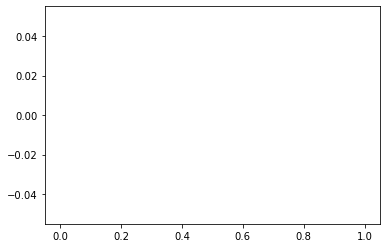

In [193]:
plt.hist(df['Mins'], bins = 15);

In [248]:
df['Mins']= df[~(df['Mins'] == '-')]['Mins'].astype(int)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        132 non-null    object 
 1   Mins        126 non-null    float64
 2   BF          132 non-null    int64  
 3   4s          132 non-null    int64  
 4   6s          132 non-null    int64  
 5   SR          132 non-null    object 
 6   Pos         132 non-null    int64  
 7   Dismissal   132 non-null    object 
 8   Inns        132 non-null    int64  
 9   Opposition  132 non-null    object 
 10  Ground      132 non-null    object 
 11  Start Date  132 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 12.5+ KB


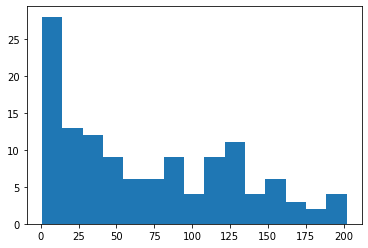

In [252]:
plt.hist(df['Mins'], bins = 15);

In [ ]:
Maximum Frequency
Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

a)A - [54.6,68)
b)B - [68,81.4)
c)C - [121.6,135)
d)All the bin ranges have the same frequency